In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on NA1
use_NA1 = []
for k in range (len(data)):
    if data['home_team'][k] == 'NA1' and data['away_team'][k] not in ['NA1', 'NA2']:
        use_NA1.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'NA1' and data['home_team'][g] not in ['NA1', 'NA2']:
        use_NA1.append(g)
data_na1 = data.filter(items = use_NA1, axis = 0)
data_na1 = data_na1.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_na1 = data_na1.replace(to_replace = r'^EU.$', value = 'Europe', regex = True)
data_na1 = data_na1.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_na1 = data_na1.replace(to_replace = r'^AF.$', value = 'Africa', regex = True)
print(data_na1)

            date home_team      away_team  year  home  away  goal_margin
1130  1950-07-02       NA1         Europe  1950    -1     1            1
1175  1952-03-23       NA1  South_America  1952    -1     1            2
1191  1952-04-20       NA1  South_America  1952    -1     1            3
1382  1956-03-04       NA1  South_America  1956    -1     1            2
1387  1956-03-08       NA1  South_America  1956    -1     1            1
...          ...       ...            ...   ...   ...   ...          ...
8613  2020-10-07    Europe            NA1  2020    -1     1            1
8660  2020-11-14      Asia            NA1  2020     1    -1            3
8667  2020-11-17      Asia            NA1  2020    -1     1            2
8668  2020-11-17      Asia            NA1  2020    -1     1            1
8680  2021-03-27    Europe            NA1  2021     1    -1            1

[583 rows x 7 columns]


In [4]:
na = []
opponent = []
match_status = []
for x in range (len(data_na1)):
    na.append('NA1')
    if np.array(data_na1['home_team'])[x] == 'NA1':
        opponent.append(np.array(data_na1['away_team'])[x])
        match_status.append(np.array(data_na1['home'])[x])
    else:
        opponent.append(np.array(data_na1['home_team'])[x])
        match_status.append(np.array(data_na1['away'])[x])
        
na1 = pd.DataFrame(data = {'north_america_tier1' : na, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_na1['goal_margin']), 'year' : np.array(data_na1['year'])})

print(na1)

    north_america_tier1       opponent  match_status  goal_margin  year
0                   NA1         Europe            -1            1  1950
1                   NA1  South_America            -1            2  1952
2                   NA1  South_America            -1            3  1952
3                   NA1  South_America            -1            2  1956
4                   NA1  South_America            -1            1  1956
..                  ...            ...           ...          ...   ...
578                 NA1         Europe             1            1  2020
579                 NA1           Asia            -1            3  2020
580                 NA1           Asia             1            2  2020
581                 NA1           Asia             1            1  2020
582                 NA1         Europe            -1            1  2021

[583 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
na1_asia = []
na1_europe =[]
na1_south_america =[]
na1_africa = []

for y in range (len(na1)):
    if opponent[y] == 'Asia':
        na1_asia.append(y)
    elif opponent[y] == 'South_America':
        na1_south_america.append(y)
    elif opponent[y] == 'Europe':
        na1_europe.append(y)
    if opponent[y] == 'Africa':
        na1_africa.append(y)
#verifying
print(len(na1_africa) + len(na1_asia) + len(na1_europe) + len(na1_south_america) )

583


In [6]:
#na1_vs_asia 
na1_vs_asia = na1.filter(items = na1_asia, axis = 0)

#na1_vs_europe 
na1_vs_europe = na1.filter(items = na1_europe, axis = 0)

#na1_vs_south_america 
na1_vs_south_america = na1.filter(items = na1_south_america, axis = 0)

#na1_vs_africa 
na1_vs_africa = na1.filter(items = na1_africa, axis = 0)

na1_vs_asia.to_excel("Na_Tier1_vs_Asia.xlsx", index = False)
na1_vs_europe.to_excel("Na_Tier1_vs_Europe.xlsx", index = False)
na1_vs_south_america.to_excel("Na_Tier1_vs_South_America.xlsx", index = False)
na1_vs_africa.to_excel("Na_Tier1_vs_Africa.xlsx", index = False)

    north_america_tier1 opponent  match_status  goal_margin  year
25                  NA1     Asia             1            4  1968
73                  NA1     Asia            -1            5  1985
93                  NA1     Asia             1            1  1986
111                 NA1     Asia             1            1  1993
134                 NA1     Asia             1            1  1995
..                  ...      ...           ...          ...   ...
557                 NA1     Asia            -1            3  2017
570                 NA1     Asia            -1            3  2018
579                 NA1     Asia            -1            3  2020
580                 NA1     Asia             1            2  2020
581                 NA1     Asia             1            1  2020

[62 rows x 5 columns]


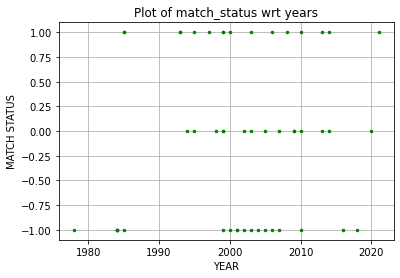

Text(0.5, 1.0, 'Histogram of match_status')

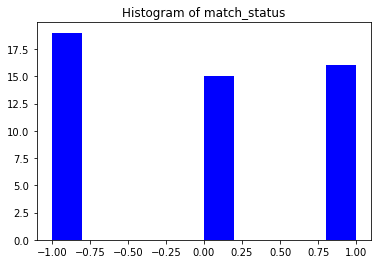

In [7]:
#checking
print(na1_vs_asia)

#plot na1_vs_africa
plt.plot(na1_vs_africa['year'], na1_vs_africa['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(na1_vs_africa['match_status'], color = 'blue')
plt.title('Histogram of match_status')